# Exploración de Imágenes
Se revisa la visualización de las diferentes categorías de hallazgos presentes en las imágenes

## Descripción de Categorías

In [1]:
import ast

import pandas as pd
from Utils import Utils
utils = Utils()

### Categorías de Hallazgos Existentes

In [2]:
findings = utils.findings

finding_categories = findings['finding_categories'].value_counts()
finding_categories

finding_categories
['No Finding']                                                                                      18232
['Mass']                                                                                             1123
['Suspicious Calcification']                                                                          402
['Focal Asymmetry']                                                                                   232
['Architectural Distortion']                                                                           95
['Asymmetry']                                                                                          90
['Suspicious Calcification', 'Mass']                                                                   82
['Suspicious Lymph Node']                                                                              57
['Skin Thickening']                                                                                    38
['Suspicious Calcification'

### Visualización por Categoría

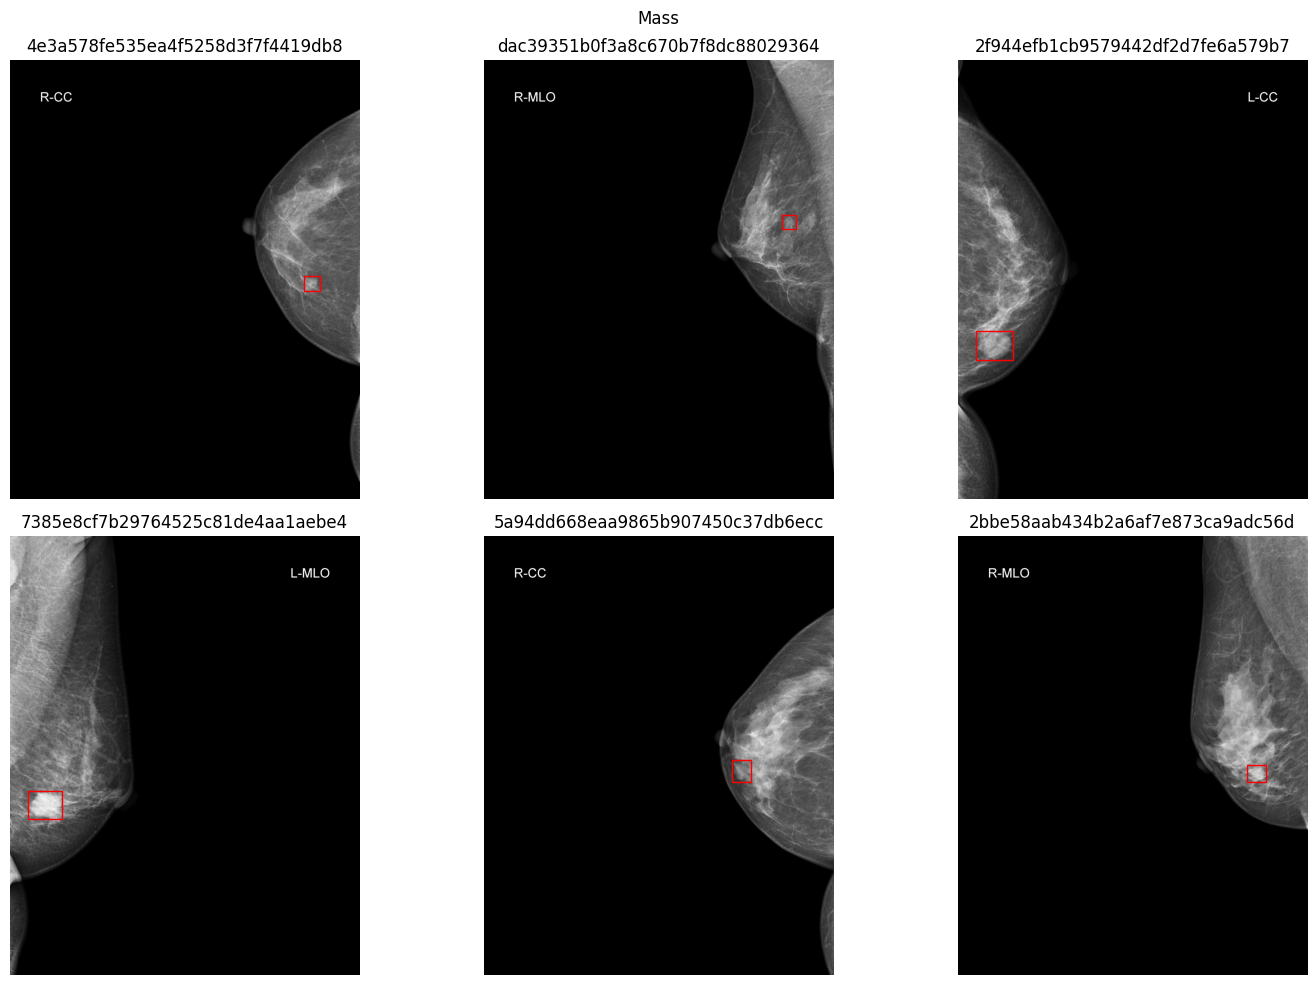

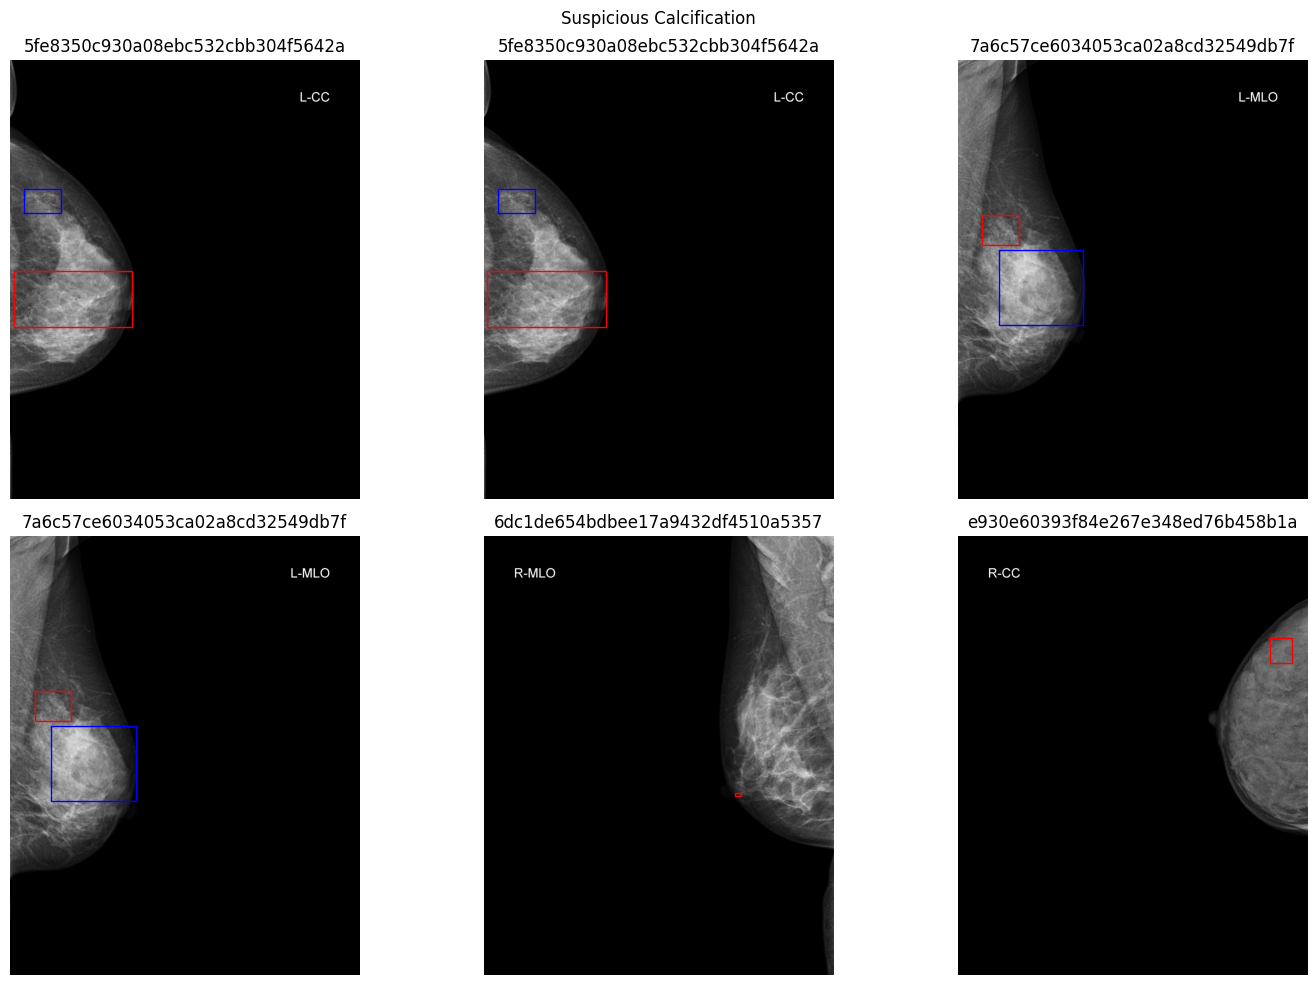

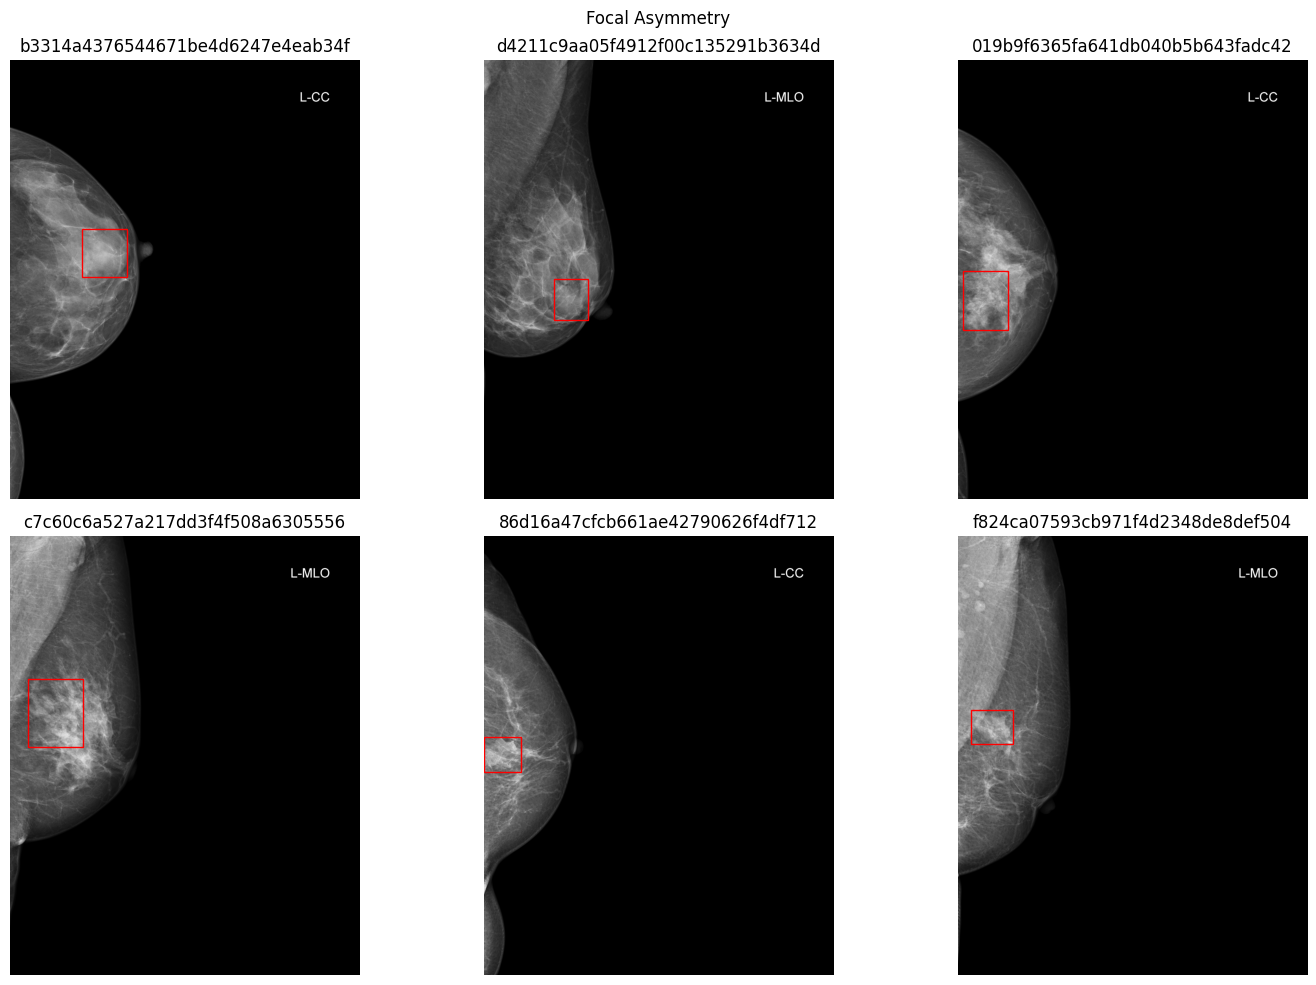

In [4]:
for finding_category in finding_categories[1:4].index: # Modificar Indica
    utils.show_sample(finding_category)

### Visualización de Imágen en Particular

1 - red - finding_categories: ['Suspicious Calcification'], 
finding_birads: BI-RADS 5, breast_birads: BI-RADS 5, Photometric Interpretation: MONOCHROME2
2 - blue - finding_categories: ['Suspicious Calcification'], 
finding_birads: BI-RADS 4, breast_birads: BI-RADS 5, Photometric Interpretation: MONOCHROME2
3 - green - finding_categories: ['Suspicious Calcification', 'Architectural Distortion'], 
finding_birads: BI-RADS 4, breast_birads: BI-RADS 5, Photometric Interpretation: MONOCHROME2


<Axes: >

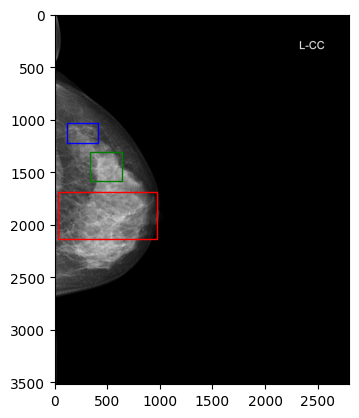

In [9]:
utils.show_image('5fe8350c930a08ebc532cbb304f5642a')

## Windowing y VOI LUT

### Window center and window width

Hace referencia a la luminosidad (brightness) y al contraste. Se suele escribir como C:W (e.g. 400:2000 might be good for visualising bone, while 50:350 might be a better choice for soft tissue).

En el gráfico, el eje Y muestra la luminosidad y el eje X la intensidad de la imagen.
![Image](Resources/img1.png)

[Referencia](https://web.archive.org/web/20150920230923/http://www.mccauslandcenter.sc.edu/mricro/dicom/index.html)

### VOI LUT
Debido a que el rango de valores de los pixels es mayor  (10 - 16 bits) que el que suelen tener las pantallas (8bits), por lo tanto solo se dispone de 256 tonos de grises y se requiere mapear many-to-one pixels usando una Look Up Table (LUT). Establecer el Window Width y Window Level resulta en un Values of Interest (VOI) LUT que se aplica a la imagen. Esto resulta en una operación con perdida. 

### Visualización de una imágen con las distintas opciones de VOI LUT y adicionalmente con la opción de Windowing
Se pueden aplicar diferentes VOI LUT, si están disponibles, modificando el argumento `index` o por el contrario, se puede seleccionar aplicar windowing si Window Width/Window Center están presentes

In [1]:
import pydicom
import pandas as pd
import numpy as np
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.pyplot as plt
from Utils import Utils
utils = Utils()

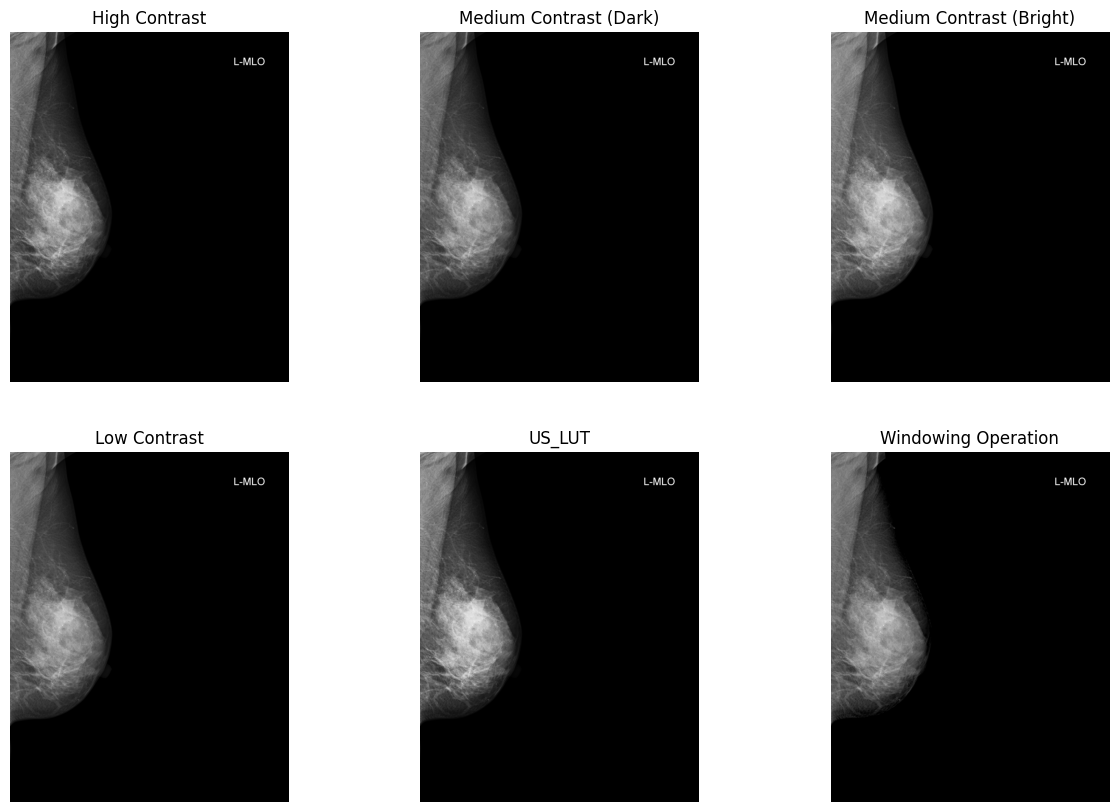

In [24]:

path = utils.get_path('7a6c57ce6034053ca02a8cd32549db7f')
dicom = pydicom.dcmread(path)
voi_lut = dicom[0x0028, 0x3010]
img_arr = dicom.pixel_array
fig, axs = plt.subplots(2, 3,  figsize=(15,10))

for index in range (6):
    i = index // 3
    j = index % 3
    
    if index <= 4:
        img = apply_voi_lut(img_arr, dicom, index)
        axs[i, j].imshow(img, cmap='gray') 
        axs[i, j].axis('off')
        axs[i, j].set_title(voi_lut[index]['LUTExplanation'].value)

    else:    
        img = apply_voi_lut(img_arr, dicom, prefer_lut=False)
        axs[i, j].imshow(img, cmap='gray') 
        axs[i, j].axis('off')
        axs[i, j].set_title('Windowing Operation')

### Revisión de Metadatos Disponibles

In [2]:
findings = utils.findings
all_images_id = findings['image_id'].unique()
all_images_id = pd.DataFrame(data=all_images_id, columns=['image_id'])
# Agregar una columna vacía (con valores NaN)
all_images_id['VOI LUT'] = np.nan
all_images_id['WW'] = np.nan
all_images_id['CW'] = np.nan

for row in all_images_id.itertuples():
    path = utils.get_path(row[1])
    dicom = pydicom.dcmread(path)
    try:
        voi_lut = dicom[0x0028, 0x3010]
        voi_lut_list = list(voi_lut)
        all_images_id.loc[row[0], 'VOI LUT'] = len(voi_lut_list)
    except KeyError:
        all_images_id.loc[row[0], 'VOI LUT'] = 0
        
    try:
        ww = dicom[0x0028, 0x1050]
        all_images_id.loc[row[0], 'WW'] = True
    except KeyError:
        all_images_id.loc[row[0], 'WW'] = False
        
    try:
        ww = dicom[0x0028, 0x1050]
        all_images_id.loc[row[0], 'CW'] = True
    except KeyError:
        all_images_id.loc[row[0], 'CW'] = False
        
    

/var/folders/24/g0h1skn164qbd93d67n8s6100000gn/T/ipykernel_8341/2247051751.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  all_images_id.loc[row[0], 'WW'] = True
/var/folders/24/g0h1skn164qbd93d67n8s6100000gn/T/ipykernel_8341/2247051751.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  all_images_id.loc[row[0], 'CW'] = True


In [3]:
all_images_id['VOI LUT'].value_counts()

VOI LUT
5.0    15244
0.0     4756
Name: count, dtype: int64

In [4]:
all_images_id['WW'].value_counts()

WW
True    20000
Name: count, dtype: int64

In [5]:
all_images_id['CW'].value_counts()

CW
True    20000
Name: count, dtype: int64

In [6]:
path = utils.get_path('7e2ac68b81c14f458e7323f2f8951cf2')
dicom = pydicom.dcmread(path)
dicom

/Users/julio/Documents/PMM/Codigos/Test1/Detection/.venv/lib/python3.11/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'c4a59146a1f5b9e2aca090815381c420'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Users/julio/Documents/PMM/Codigos/Test1/Detection/.venv/lib/python3.11/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '7e2ac68b81c14f458e7323f2f8951cf2'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Users/julio/Documents/PMM/Codigos/Test1/Detection/.venv/lib/python3.11/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'a235482f737d9a3baa8313c8f4db16d6'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Use

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 156
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: c4a59146a1f5b9e2aca090815381c420
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 7e2ac68b81c14f458e7323f2f8951cf2
(0008, 0060) Modality                            CS: 'MG'
(0008, 0068) Presentation Intent Type            CS: 'FOR PRESENTATION'
(0008, 0070) Manufacturer                        LO: 'Planmed'
(0008, 1090) Manufacturer's Model Name           LO: 'Planmed Nuance'
(0010, 0040) Patient'

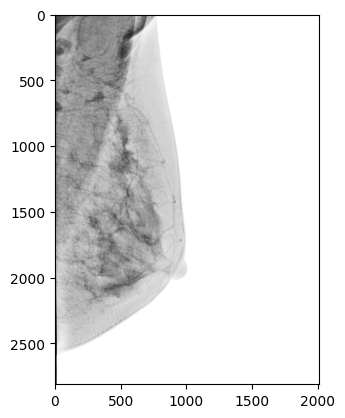

In [87]:
arr = dicom.pixel_array
img = apply_voi_lut(arr, dicom, prefer_lut=False)
plt.imshow(img, cmap='gray')

In [88]:
findings.loc[findings['image_id'] == '7e2ac68b81c14f458e7323f2f8951cf2']

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
1533,a235482f737d9a3baa8313c8f4db16d6,04537b722941baed999656a0a316c9ea,7e2ac68b81c14f458e7323f2f8951cf2,L,MLO,2812,2012,BI-RADS 4,DENSITY C,['Suspicious Calcification'],BI-RADS 4,423.080994,725.151001,639.898987,1230.489990,training
1534,a235482f737d9a3baa8313c8f4db16d6,04537b722941baed999656a0a316c9ea,7e2ac68b81c14f458e7323f2f8951cf2,L,MLO,2812,2012,BI-RADS 4,DENSITY C,['Suspicious Calcification'],BI-RADS 4,537.060974,1426.569946,692.002991,1644.579956,training
